In [ ]:
# started 10-13-2025

In [11]:
import pandas as pd
import numpy as np
import tensorflow as tf


import seaborn as sns
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LeakyReLU
from tensorflow.keras.layers import Normalization

from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.model_selection import train_test_split

In [3]:
fires = pd.read_csv("fires_with_pop.csv")

In [4]:
fires.head()

,OBJECTID,FIRE_YEAR,DISCOVERY_DATE,FIRE_SIZE,STAT_CAUSE_DESCR,LATITUDE,LONGITUDE,OBJECTID.1,temp_max_F,humidity_pct,precip_in,windspeed_mph,time,ndvi,pop_density
0,110,2005,2453540.5,10.0,Equipment Use,33.718889,-117.433611,110,73.04,89,0.062992,6.028589,1970-01-01 00:00:00.002453540,5016.0,1631.960938
1,155,2005,2453411.5,3.0,Debris Burning,34.748333,-119.410278,155,58.46,79,0.000000,4.536979,1970-01-01 00:00:00.002453411,3357.0,0.696928
2,178,2005,2453544.5,4.2,Equipment Use,34.466667,-119.828333,178,77.54,76,0.000000,15.972654,1970-01-01 00:00:00.002453544,4356.0,24.228647
3,1053,2005,2453559.5,3.0,Miscellaneous,34.479444,-118.768611,1053,82.76,86,0.000000,6.028589,1970-01-01 00:00:00.002453559,3124.0,0.044615
4,1282,2005,2453582.5,2.0,Lightning,33.110833,-116.847222,1282,87.62,88,0.000000,8.763207,1970-01-01 00:00:00.002453582,4180.0,0.154729


In [5]:
fires = fires.sample(frac=1, random_state = 5)

<Axes: xlabel='FIRE_SIZE', ylabel='Count'>

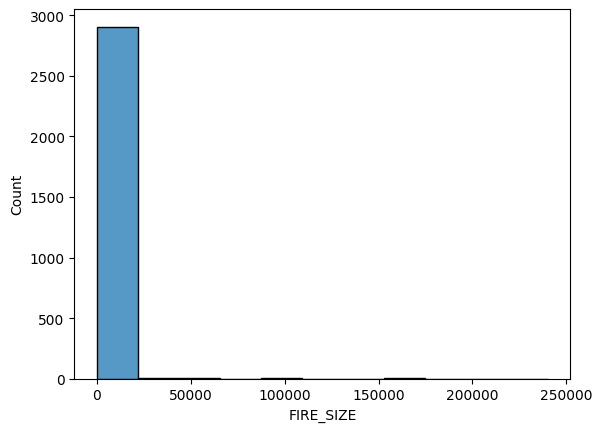

In [52]:
sns.histplot(data=fires["FIRE_SIZE"], bins=11, kde=False)

c:\Users\Yash\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='pop_density', ylabel='Count'>

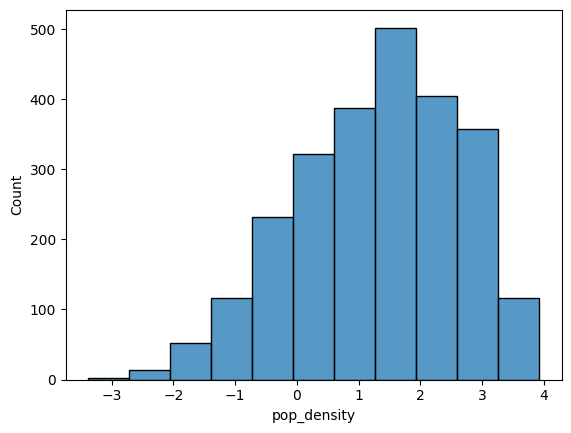

In [ ]:
sns.histplot(data=np.log10(fires["pop_density"]), bins=11, kde=False)v

In [7]:
fires.corr(numeric_only=True)

,OBJECTID,FIRE_YEAR,DISCOVERY_DATE,FIRE_SIZE,LATITUDE,LONGITUDE,OBJECTID.1,temp_max_F,humidity_pct,precip_in,windspeed_mph,ndvi,pop_density
OBJECTID,1.000000,0.724785,0.723057,-0.096118,-0.098185,0.044267,1.000000,-0.076047,0.089247,-0.002504,0.024488,-0.079413,0.111364
FIRE_YEAR,0.724785,1.000000,0.998150,-0.034775,0.012318,-0.073362,0.724785,-0.077494,0.026150,-0.013048,0.052482,0.022508,0.075882
DISCOVERY_DATE,0.723057,0.998150,1.000000,-0.031879,0.012152,-0.078066,0.723057,-0.066895,0.023370,-0.012887,0.045028,0.029100,0.073844
FIRE_SIZE,-0.096118,-0.034775,-0.031879,1.000000,0.028925,-0.057219,-0.096118,0.004367,-0.038592,-0.008663,0.023431,0.079080,-0.025410
LATITUDE,-0.098185,0.012318,0.012152,0.028925,1.000000,-0.679641,-0.098185,0.005343,-0.178536,-0.004261,-0.062924,-0.031825,0.017422
LONGITUDE,0.044267,-0.073362,-0.078066,-0.057219,-0.679641,1.000000,0.044267,0.235064,-0.141372,0.013715,0.034864,-0.228041,-0.048482
OBJECTID.1,1.000000,0.724785,0.723057,-0.096118,-0.098185,0.044267,1.000000,-0.076047,0.089247,-0.002504,0.024488,-0.079413,0.111364
temp_max_F,-0.076047,-0.077494,-0.066895,0.004367,0.005343,0.235064,-0.076047,1.000000,-0.453242,-0.066382,-0.107019,-0.143312,-0.044629
humidity_pct,0.089247,0.026150,0.023370,-0.038592,-0.178536,-0.141372,0.089247,-0.453242,1.000000,0.089772,-0.032953,0.104203,0.097833
precip_in,-0.002504,-0.013048,-0.012887,-0.008663,-0.004261,0.013715,-0.002504,-0.066382,0.089772,1.000000,-0.045733,0.022210,-0.018260


In [8]:
rows_with_missing = fires[fires.isnull().any(axis=1)]
rows_with_missing

,OBJECTID,FIRE_YEAR,DISCOVERY_DATE,FIRE_SIZE,STAT_CAUSE_DESCR,LATITUDE,LONGITUDE,OBJECTID.1,temp_max_F,humidity_pct,precip_in,windspeed_mph,time,ndvi,pop_density
2574,1788879,2014,2456834.5,21.0,Missing/Undefined,34.411058,-119.877385,1788879,80.06,65,0.0,17.215662,1970-01-01 00:00:00.002456834,NaN,70.186066


In [9]:
fires = fires.dropna()

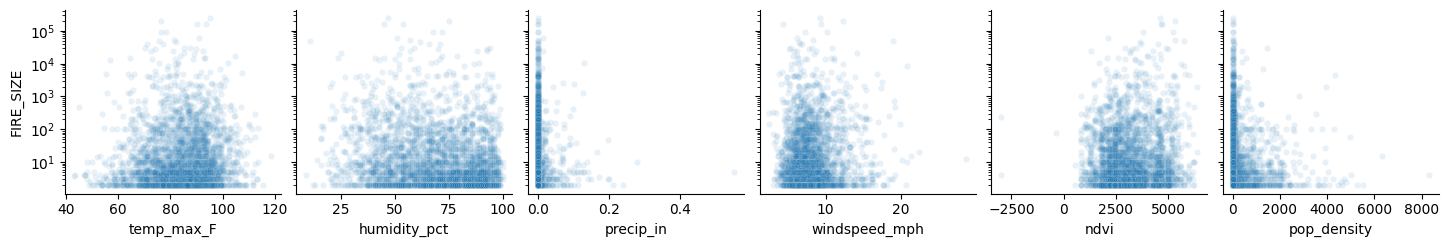

In [13]:
g = sns.pairplot(
    fires,
    x_vars=["temp_max_F", "humidity_pct", "precip_in", "windspeed_mph", "ndvi", "pop_density"],
    y_vars=["FIRE_SIZE"],
    plot_kws={"alpha": 0.1, "s": 20}
)

# Set y-axis to log scale
for ax in g.axes[:, 0]:  # first (and only) column of axes
    ax.set_yscale("log")

plt.show()
# semi log shows streaks in data

In [21]:
fires_data = fires[["FIRE_SIZE","temp_max_F", "humidity_pct", "precip_in", "windspeed_mph", "ndvi", "pop_density"]].copy()
fires_data

,FIRE_SIZE,temp_max_F,humidity_pct,precip_in,windspeed_mph,ndvi,pop_density
2797,2.0,95.54,69,0.0,13.486638,1730.0,0.179826
1790,3.3,93.20,67,0.0,7.271597,2349.0,190.295441
186,340.0,82.76,72,0.0,8.949658,4448.0,4.345961
2504,21.6,75.74,69,0.0,6.712244,2227.0,0.448555
976,8.0,78.80,16,0.0,15.972654,4496.0,200.983292
...,...,...,...,...,...,...,...
2121,47.0,80.78,84,0.0,8.328154,3307.0,5.190183
1424,7.0,79.88,93,0.0,12.865134,4649.0,0.000000
1725,78.8,102.74,50,0.0,7.147296,832.0,8.337157
2254,110.0,93.92,60,0.0,7.022996,4583.0,0.627736


In [22]:
fires_data["FIRE_SIZE"] = np.log10(fires_data["FIRE_SIZE"])

<Axes: xlabel='pop_density', ylabel='Count'>

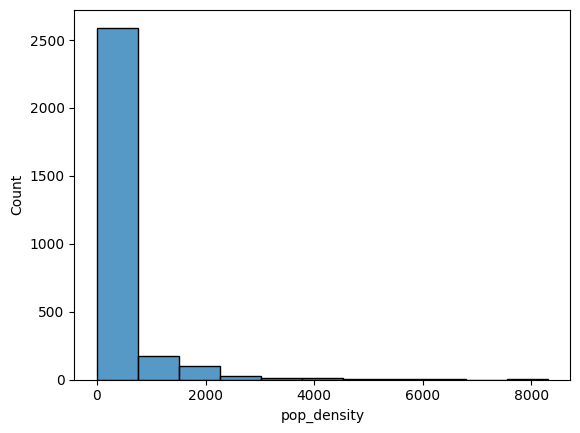

In [23]:
sns.histplot(data=fires["pop_density"], bins=11, kde=False)

In [24]:
iqr_cols = ["windspeed_mph"] # not including precip bc it has such a long and small tail, everything's just gonna get clipped
zscore_cols = ["temp_max_F", "humidity_pct"]

In [25]:
for col in iqr_cols:
    Q1 = fires_data[col].quantile(0.25)
    Q3 = fires_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.9 * IQR
    upper = Q3 + 1.9 * IQR
    fires_data[col] = fires_data[col].clip(lower, upper)

In [26]:
k = 3 # 3 std from mean (99.7%)
for col in zscore_cols:
    mean = fires_data[col].mean()
    std = fires_data[col].std()
    lower = mean - k * std
    upper = mean + k * std
    fires_data[col] = fires_data[col].clip(lower, upper)

In [27]:
fires_data

,FIRE_SIZE,temp_max_F,humidity_pct,precip_in,windspeed_mph,ndvi,pop_density
2797,0.301030,95.54,69.0,0.0,13.486638,1730.0,0.179826
1790,0.518514,93.20,67.0,0.0,7.271597,2349.0,190.295441
186,2.531479,82.76,72.0,0.0,8.949658,4448.0,4.345961
2504,1.334454,75.74,69.0,0.0,6.712244,2227.0,0.448555
976,0.903090,78.80,16.0,0.0,13.971411,4496.0,200.983292
...,...,...,...,...,...,...,...
2121,1.672098,80.78,84.0,0.0,8.328154,3307.0,5.190183
1424,0.845098,79.88,93.0,0.0,12.865134,4649.0,0.000000
1725,1.896526,102.74,50.0,0.0,7.147296,832.0,8.337157
2254,2.041393,93.92,60.0,0.0,7.022996,4583.0,0.627736


In [28]:
X = fires_data.drop("FIRE_SIZE", axis=1)
y = fires_data["FIRE_SIZE"]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [30]:
power_cols = ["precip_in", "windspeed_mph", "pop_density"]
standard_cols = ["temp_max_F", "humidity_pct", "ndvi"]

In [31]:
std_scaler = StandardScaler()
pwr_scaler = PowerTransformer()

In [32]:
X_train[standard_cols] = std_scaler.fit_transform(X_train[standard_cols])
X_train[power_cols] = pwr_scaler.fit_transform(X_train[power_cols])

X_test[standard_cols] = std_scaler.transform(X_test[standard_cols])
X_test[power_cols] = pwr_scaler.transform(X_test[power_cols])

In [33]:
X_train

,temp_max_F,humidity_pct,precip_in,windspeed_mph,ndvi,pop_density
1191,-2.284273,0.685029,-0.310953,-1.164227,-0.594696,0.842023
1990,-1.181446,-0.754275,-0.310953,0.044621,0.445292,-1.010709
2513,0.456577,-1.114101,-0.310953,0.632677,-0.982280,-0.663631
567,-1.116574,1.199066,-0.310953,0.657105,-0.249203,-0.176829
2338,-0.273235,1.250470,-0.310953,0.324678,0.577702,-0.366687
...,...,...,...,...,...,...
2579,-1.278754,-0.600064,-0.310953,0.482217,-0.334261,-0.680058
1381,-0.451633,0.736433,-0.310953,-0.166033,0.134874,1.364005
2639,-1.489589,1.301873,1.333992,0.351452,0.992470,-0.441925
596,1.024209,-0.445853,-0.310953,-2.313137,-1.073477,0.179577


In [34]:
y_train

1191    0.301030
1990    0.778151
2513    1.041393
567     0.477121
2338    0.556303
          ...   
2579    2.800717
1381    1.447158
2639    0.903090
596     0.903090
2672    2.324282
Name: FIRE_SIZE, Length: 2340, dtype: float64

In [49]:
model = Sequential([
    Dense(64, activation="relu"),
    
    Dense(128, activation="relu"),
    Dropout(0.2),
    
    
    Dense(32, activation="relu"),
    
    Dense(32, activation="relu"),
    
    Dense(1)
])

In [50]:
model.compile(optimizer="adam", loss="mae", metrics=["mae"])

In [51]:
history = model.fit(
    X_train,
    y_train,
    epochs=30,
    validation_split=0.2,
    verbose=1
)

Epoch 1/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.7667 - mae: 0.7667 - val_loss: 0.6230 - val_mae: 0.6230
Epoch 2/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6398 - mae: 0.6398 - val_loss: 0.6158 - val_mae: 0.6158
Epoch 3/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6158 - mae: 0.6158 - val_loss: 0.6123 - val_mae: 0.6123
Epoch 4/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5994 - mae: 0.5994 - val_loss: 0.6082 - val_mae: 0.6082
Epoch 5/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6053 - mae: 0.6053 - val_loss: 0.6002 - val_mae: 0.6002
Epoch 6/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5941 - mae: 0.5941 - val_loss: 0.6044 - val_mae: 0.6044
Epoch 7/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6040 - mae: 0.6040 - val_loss: 0.6095 - val_mae: 0.6095
Epoch 8/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5851 - mae: 0.5851 - val_loss: 0.6041 - val_mae: 0.6041
Epoch 9/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5898 - mae: 

In [38]:
loss = model.evaluate(X_test, y_test)
print(f"Test loss mae: {loss[1]}")

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6648 - mae: 0.6648 
Test loss mae: 0.6564870476722717


In [39]:
y_pred = model.predict(X_test)
y_pred

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


array([[0.8074736 ],
       [0.54509836],
       [0.71375686],
       [1.3747004 ],
       [0.8910273 ],
       [0.63657796],
       [0.5841992 ],
       [0.69774693],
       [0.7048706 ],
       [0.9576297 ],
       [0.98545104],
       [0.48776168],
       [0.48996484],
       [0.6397507 ],
       [0.96676815],
       [0.8935082 ],
       [0.39815181],
       [1.084321  ],
       [1.0518417 ],
       [0.45124114],
       [1.0469812 ],
       [0.6134752 ],
       [0.4769251 ],
       [0.75586677],
       [0.43811116],
       [1.1526597 ],
       [1.0385703 ],
       [0.72365755],
       [0.8314301 ],
       [0.5817065 ],
       [0.6926788 ],
       [0.539738  ],
       [0.63856006],
       [0.775911  ],
       [0.55697536],
       [0.581536  ],
       [0.821043  ],
       [1.1759648 ],
       [0.5882392 ],
       [0.7133374 ],
       [0.81462216],
       [1.4051623 ],
       [1.0671655 ],
       [0.6922654 ],
       [1.0920835 ],
       [0.9581717 ],
       [0.5605961 ],
       [0.843

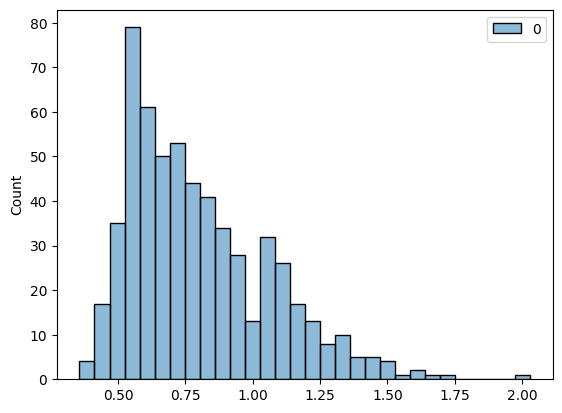

In [40]:
sns.histplot(data=y_pred, bins=30, kde=False)
plt.show()

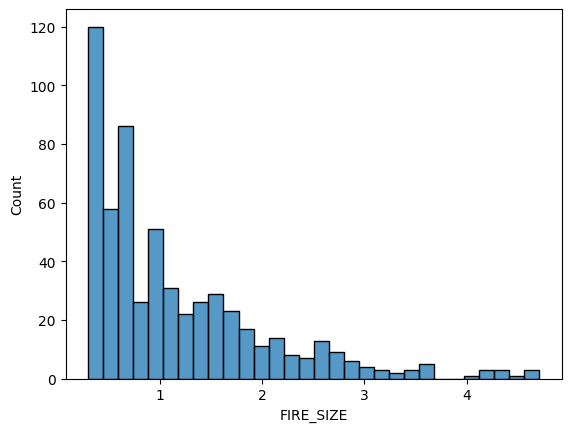

In [41]:
sns.histplot(data=y_test, bins=30, kde=False)
plt.show()

In [42]:
import shap

In [43]:
background = X_test.to_numpy()

In [44]:
X_test_sample = X_test.to_numpy()

In [45]:
feature_names = X_test.columns.tolist()

In [46]:
explainer = shap.DeepExplainer(model, background) # init explainer

c:\Users\Yash\AppData\Local\Programs\Python\Python312\Lib\site-packages\shap\explainers\_deep\deep_tf.py:94: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn(
c:\Users\Yash\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\models\functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=['Tensor(shape=(585, 6))']
  warnings.warn(msg)


In [47]:
shap_values = explainer.shap_values(X_test_sample) # gives array of size (#rows,5,1)
shap_values = np.squeeze(shap_values, axis=2) # converts to (#rows,5)


c:\Users\Yash\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\models\functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=['Tensor(shape=(1170, 6))']
  warnings.warn(msg)


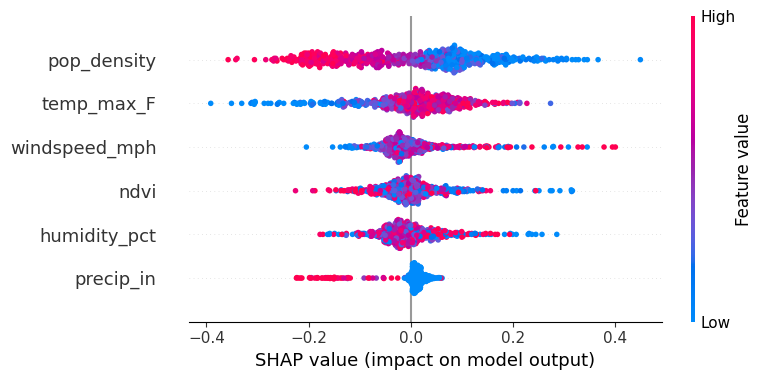

In [48]:
shap.summary_plot(shap_values, X_test_sample, feature_names=feature_names)